In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.9 MB/s 
     |████████████████████████████████| 9.9 MB 29.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np

#Read Data

In [3]:
df=pd.read_csv('USA.csv')
df=df.dropna()
df.set_index('date', inplace=True)
print('Shape of data',df.shape)
df.iloc[:,0:5]

Shape of data (819, 14)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index
date,,,,,
7/15/2020,197.013,2.858,1.13,0.0,68.98
7/16/2020,210.135,2.887,1.11,0.0,68.98
7/17/2020,196.868,2.733,1.10,0.0,68.98
7/18/2020,190.782,2.638,1.09,0.0,68.98
7/19/2020,175.028,1.433,1.08,0.0,68.98
...,...,...,...,...,...
10/7/2022,217.809,1.166,0.86,0.0,25.99
10/8/2022,22.659,0.139,0.86,0.0,25.99
10/9/2022,14.905,0.012,0.86,0.0,25.99


#Plot Your Data

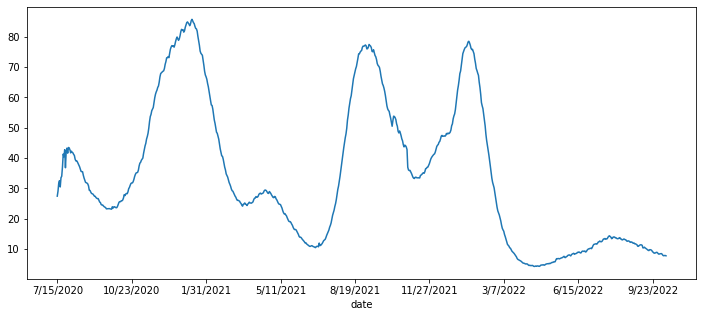

In [4]:
df['icu_patients_per_million'].plot(figsize=(12,5))

#Check For Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [6]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.677109189166949
2. P-Value :  0.07808382940608465
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 797
5. Critical Values :
	 1% :  -3.438581476199162
	 5% :  -2.865173218890781
	 10% :  -2.56870466056054


#Figure Out Order for ARIMA Model

In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=inf, Time=7.97 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=2160.340, Time=0.28 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=1742.250, Time=0.94 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=1838.640, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=2158.919, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[14] intercept   : AIC=1829.572, Time=0.24 sec
 ARIMA(1,1,0)(2,0,0)[14] intercept   : AIC=1744.009, Time=2.61 sec
 ARIMA(1,1,0)(1,0,1)[14] intercept   : AIC=1744.085, Time=1.41 sec
 ARIMA(1,1,0)(0,0,1)[14] intercept   : AIC=1767.807, Time=0.78 sec
 ARIMA(1,1,0)(2,0,1)[14] intercept   : AIC=1744.642, Time=6.22 sec
 ARIMA(0,1,0)(1,0,0)[14] intercept   : AIC=1869.709, Time=0.78 sec
 ARIMA(2,1,0)(1,0,0)[14] intercept   : AIC=1606.158, Time=1.28 sec
 ARIMA(2,1,0)(0,0,0)[14] intercept   : AIC=1708.086, Time=0.41 sec
 ARIMA(2,1,0)(2,0,0)[14] intercept   : AIC=1592.344, Time=4.36 sec
 ARIMA(2,1,0)(2,0,1)[14]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  819
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 14)   Log Likelihood                -699.325
Date:                            Mon, 05 Dec 2022   AIC                           1418.649
Time:                                    23:44:04   BIC                           1465.718
Sample:                                07-15-2020   HQIC                          1436.712
                                     - 10-11-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.002      0.201      0.841      -0.003       0.004
ar.L1          0.5614      0.050     11.237      0.000       0.463       0.659
ar.L2          0.2212      0.026      8.405      0.000       0.170       0.273
ar.L3         -0.0022      0.016     -0.134      0.894      -0.034       0.030
ar.L4         -0.0846      0.028     -3.020      0.003      -0.140      -0.030
ar.L5          0.2843      0.026     10.783      0.000       0.233       0.336
ma.L1         -0.4839      0.057     -8.502      0.000      -0.596      -0.372
ar.S.L14       0.9560      0.014     67.329      0.000       0.928       0.984
ma.S.L14      -0.8151      0.033    -24.477      0.000      -0.880      -0.750
sigma2         0.3186      0.007     45.524      0.000       0.305       0.332
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             32210.00
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
#model=auto_arima(df['icu_patients'], start_p=0, start_q=0, d=0,max_p=5,max_q=5,max_d=5,start_P=0,D=0,start_Q=0, max_P=5, max_D=5, max_Q=5, seasonal= True, information_criteria='AIC' )
#model.summary()

In [10]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

In [11]:
print(df.shape)
train=df.iloc[:-30,[0,1,2,3,4,13]]
test=df.iloc[-30:,[0,1,2,3,4,13]]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(819, 14)
(789, 6) (30, 6)


In [12]:
train.head()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
7/15/2020,197.013,2.858,1.13,0.0,68.98,27.433
7/16/2020,210.135,2.887,1.11,0.0,68.98,29.071
7/17/2020,196.868,2.733,1.10,0.0,68.98,31.751
7/18/2020,190.782,2.638,1.09,0.0,68.98,32.531
7/19/2020,175.028,1.433,1.08,0.0,68.98,30.466


In [13]:
test.head()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
9/12/2022,206.254,1.359,0.90,184.89,26.02,10.605
9/13/2022,236.465,1.537,0.88,185.04,26.02,10.359
9/14/2022,307.429,2.878,0.86,185.20,26.02,10.190
9/15/2022,247.141,1.973,0.85,185.37,26.01,10.003
9/16/2022,167.443,1.273,0.86,185.56,26.01,9.807


In [14]:
ts=df['icu_patients_per_million']
ts

date
7/15/2020     27.433
7/16/2020     29.071
7/17/2020     31.751
7/18/2020     32.531
7/19/2020     30.466
               ...  
10/7/2022      7.875
10/8/2022      7.772
10/9/2022      7.852
10/10/2022     7.855
10/11/2022     7.757
Name: icu_patients_per_million, Length: 819, dtype: float64

In [15]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [16]:
model=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30) )
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:         icu_patients_per_million   No. Observations:                  789
Model:             ARIMA(5, 1, 1)x(1, 0, 1, 30)   Log Likelihood                -741.403
Date:                          Mon, 05 Dec 2022   AIC                           1502.806
Time:                                  23:44:28   BIC                           1549.501
Sample:                              07-15-2020   HQIC                          1520.757
                                   - 09-11-2022                                         
Covariance Type:                            opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
new_cases_per_million     0.0003   8.04e-05      4.280      0.000       0.000       0.001
ar.L1                     0.3393      0.038      8.881      0.000       0.264       0.414
ar.L2                     0.1919      0.021      9.069      0.000       0.150       0.233
ar.L3                     0.0462      0.018      2.593      0.010       0.011       0.081
ar.L4                    -0.0917      0.021     -4.281      0.000      -0.134      -0.050
ar.L5                     0.3915      0.016     24.026      0.000       0.360       0.423
ma.L1                    -0.2881      0.044     -6.494      0.000      -0.375      -0.201
ar.S.L30                  0.0186      0.228      0.082      0.935      -0.428       0.465
ma.S.L30                 -0.2160      0.231     -0.935      0.350      -0.669       0.237
sigma2                    0.3581      0.006     55.144      0.000       0.345       0.371
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):             22267.79
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [17]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(exog=test.iloc[:,0:1],start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

date
9/12/2022     10.337376
9/13/2022     10.267083
9/14/2022     10.236856
9/15/2022      9.866967
9/16/2022      9.767004
9/17/2022      9.557316
9/18/2022      9.497893
9/19/2022      9.506171
9/20/2022      9.334193
9/21/2022      9.278805
9/22/2022      9.171331
9/23/2022      9.122116
9/24/2022      8.937595
9/25/2022      8.816094
9/26/2022      8.805450
9/27/2022      8.769658
9/28/2022      8.730075
9/29/2022      8.702706
9/30/2022      8.577899
10/1/2022      8.503847
10/2/2022      8.457406
10/3/2022      8.519854
10/4/2022      8.470600
10/5/2022      8.388988
10/6/2022      8.293699
10/7/2022      8.254664
10/8/2022      8.130751
10/9/2022      8.108863
10/10/2022     8.237127
10/11/2022     8.218401
Name: predicted_mean, dtype: float64


In [18]:
#model.forecast()

ValueError: ignored

In [ ]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

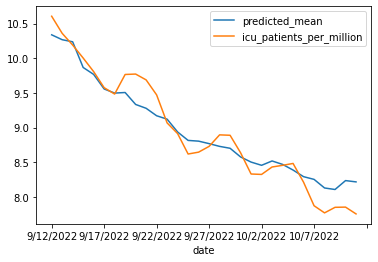

In [19]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)

In [20]:
test['icu_patients_per_million'].mean()

8.9494

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)


0.22527205397031644


# PREPING DATA FOR ANN

In [22]:
predicted_list, error_list = [], []
training_data = train


In [23]:
model = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30))
model_fit = model.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))


predicted=10.337376, expected=10.605000 error=0.267624
predicted=10.267083, expected=10.359000 error=0.091917
predicted=10.236856, expected=10.190000 error=0.046856
predicted=9.866967, expected=10.003000 error=0.136033
predicted=9.767004, expected=9.807000 error=0.039996
predicted=9.557316, expected=9.576000 error=0.018684
predicted=9.497893, expected=9.484000 error=0.013893
predicted=9.506171, expected=9.766000 error=0.259829
predicted=9.334193, expected=9.772000 error=0.437807
predicted=9.278805, expected=9.688000 error=0.409195
predicted=9.171331, expected=9.472000 error=0.300669
predicted=9.122116, expected=9.068000 error=0.054116
predicted=8.937595, expected=8.914000 error=0.023595
predicted=8.816094, expected=8.620000 error=0.196094
predicted=8.805450, expected=8.647000 error=0.158450
predicted=8.769658, expected=8.730000 error=0.039658
predicted=8.730075, expected=8.896000 error=0.165925
predicted=8.702706, expected=8.890000 error=0.187294
predicted=8.577899, expected=8.638000 e

In [24]:
print(error_list)


[0.2676240370089715, 0.09191657970325373, -0.046855501961527324, 0.13603331830193, 0.039995745060631194, 0.01868360944963321, -0.013892755693245107, 0.25982856864729165, 0.43780691320446685, 0.4091953528015857, 0.3006690881067655, -0.05411598852983879, -0.02359524818560388, -0.19609396629766174, -0.15845032699621875, -0.03965828900370383, 0.1659248884483162, 0.18729400630227566, 0.0601009629484377, -0.17184695636448133, -0.13140609051650642, -0.08685350006303771, -0.01360049946103814, 0.09501205114441724, -0.0796989837510278, -0.3796642029085966, -0.3587506005888663, -0.2568629260691484, -0.3821265564091352, -0.4614005106889856]


In [25]:
# test_resid = []
# for i in resid_test:
#     test_resid.append(i[0])

error = mean_squared_error(test.iloc[0:30,-1], predicted_list[0:30])
print('Test MSE: %.3f' % error)

Test MSE: 0.051


In [26]:
training_error = model_fit.resid


In [27]:
training_error=np.array(training_error)
training_error

array([ 2.73652395e+01,  1.63348265e+00,  2.24842235e+00, -2.50013612e-01,
       -3.32983390e+00,  2.36674645e+00,  1.33433597e-02,  1.44767552e+00,
        2.91259765e+00, -9.64350031e-01,  2.54016224e-01, -6.55418081e+00,
        4.35407865e+00, -2.38708271e-01, -2.25411160e+00, -7.92547499e-02,
        2.30339340e+00, -2.15747564e+00, -2.02358577e+00,  1.31082103e+00,
       -6.77823942e-01, -2.67540744e-01, -3.13710673e-01,  2.54792582e-01,
       -1.15801456e+00, -1.23377233e-01,  5.03596906e-01,  1.60890746e-01,
       -3.98045299e-01, -6.65107192e-02,  2.85093254e-01, -3.34499607e-01,
       -1.13401338e-01,  3.39087518e-01, -9.67709766e-02, -4.61403970e-01,
       -5.17456778e-01,  2.46930340e-01,  2.87298357e-01, -3.04788493e-02,
        5.27024620e-01, -9.75546688e-01,  5.74869687e-01, -9.82035177e-01,
       -1.06961078e-01, -1.15759082e-01,  2.86478699e-01, -1.91385455e-01,
        2.58644570e-01,  1.69691151e-01, -2.22296255e-01,  2.56046504e-01,
       -2.40671037e-01, -

#**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [29]:
model = Sequential()
model.add(Dense(100, input_dim=7, activation="tanh"))
model.add(Dense(50,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')



In [30]:
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])


In [31]:
train_X

[array([ 2.73652395e+01,  1.63348265e+00,  2.24842235e+00, -2.50013612e-01,
        -3.32983390e+00,  2.36674645e+00,  1.33433597e-02]),
 array([ 1.63348265,  2.24842235, -0.25001361, -3.3298339 ,  2.36674645,
         0.01334336,  1.44767552]),
 array([ 2.24842235, -0.25001361, -3.3298339 ,  2.36674645,  0.01334336,
         1.44767552,  2.91259765]),
 array([-0.25001361, -3.3298339 ,  2.36674645,  0.01334336,  1.44767552,
         2.91259765, -0.96435003]),
 array([-3.3298339 ,  2.36674645,  0.01334336,  1.44767552,  2.91259765,
        -0.96435003,  0.25401622]),
 array([ 2.36674645,  0.01334336,  1.44767552,  2.91259765, -0.96435003,
         0.25401622, -6.55418081]),
 array([ 0.01334336,  1.44767552,  2.91259765, -0.96435003,  0.25401622,
        -6.55418081,  4.35407865]),
 array([ 1.44767552,  2.91259765, -0.96435003,  0.25401622, -6.55418081,
         4.35407865, -0.23870827]),
 array([ 2.91259765, -0.96435003,  0.25401622, -6.55418081,  4.35407865,
        -0.23870827, -2.254

In [32]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [33]:
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

In [34]:
print(new_train_X)

[[ 2.73652395e+01  1.63348265e+00  2.24842235e+00 ... -3.32983390e+00
   2.36674645e+00  1.33433597e-02]
 [ 1.63348265e+00  2.24842235e+00 -2.50013612e-01 ...  2.36674645e+00
   1.33433597e-02  1.44767552e+00]
 [ 2.24842235e+00 -2.50013612e-01 -3.32983390e+00 ...  1.33433597e-02
   1.44767552e+00  2.91259765e+00]
 ...
 [-5.96217735e-03 -3.92635680e-01  1.79820811e-01 ...  1.60449955e-01
   4.53122359e-02  1.71478293e-01]
 [-3.92635680e-01  1.79820811e-01  3.35863932e-01 ...  4.53122359e-02
   1.71478293e-01 -1.09274960e-01]
 [ 1.79820811e-01  3.35863932e-01  1.60449955e-01 ...  1.71478293e-01
  -1.09274960e-01 -8.52931008e-01]]


In [35]:
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)


Epoch 1/400
40/40 [==============================] - 1s 4ms/step - loss: 0.3314
Epoch 2/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2969
Epoch 3/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2863
Epoch 4/400
40/40 [==============================] - 0s 4ms/step - loss: 0.2670
Epoch 5/400
40/40 [==============================] - 0s 4ms/step - loss: 0.2618
Epoch 6/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2454
Epoch 7/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2414
Epoch 8/400
40/40 [==============================] - 0s 4ms/step - loss: 0.2419
Epoch 9/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 10/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2287
Epoch 11/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2202
Epoch 12/400
40/40 [==============================] - 0s 4ms/step - loss: 0.2318
Epoch 13/400
40/40 [=================

In [36]:
# test_extended = error_list
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)


In [37]:
test_data = np.array(test_data)

In [38]:
test_data

array([ 0.26762404,  0.09191658, -0.0468555 ,  0.13603332,  0.03999575,
        0.01868361, -0.01389276,  0.25982857,  0.43780691,  0.40919535,
        0.30066909, -0.05411599, -0.02359525, -0.19609397, -0.15845033,
       -0.03965829,  0.16592489,  0.18729401,  0.06010096, -0.17184696,
       -0.13140609, -0.0868535 , -0.0136005 ,  0.09501205, -0.07969898,
       -0.3796642 , -0.3587506 , -0.25686293, -0.38212656, -0.46140051])

In [39]:

test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])


In [40]:
new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
 


In [41]:
predictions = model.predict(new_test_X)
predictions


1/1 [==============================] - 0s 120ms/step


array([[ 5.05461514e-01],
       [ 2.60555506e-01],
       [-3.32117081e-01],
       [-1.30636990e-03],
       [ 2.31545419e-02],
       [-1.26480907e-02],
       [-4.04802680e-01],
       [ 3.49777460e-01],
       [ 3.58606875e-01],
       [ 6.72676384e-01],
       [ 5.50981015e-02],
       [-8.93219858e-02],
       [ 4.52676862e-02],
       [ 1.81603596e-01],
       [-2.85392225e-01],
       [-1.10118195e-01],
       [-1.22145936e-01],
       [ 5.92842698e-04],
       [ 5.74433953e-02],
       [-1.88023224e-01],
       [ 1.91148087e-01],
       [-1.23765811e-01],
       [ 5.39782196e-02]], dtype=float32)

In [42]:
Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

In [43]:
pred

,0
0,0.505462
1,0.260556
2,-0.332117
3,-0.001306
4,0.023155
5,-0.012648
6,-0.404803
7,0.349777
8,0.358607
9,0.672676


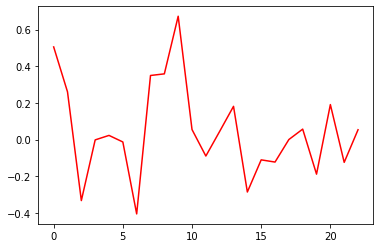

Test MSE: 0.109


In [45]:
import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


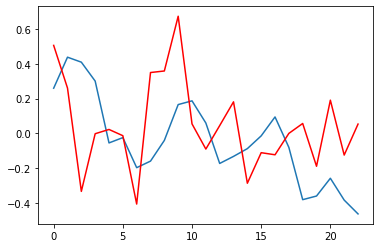

Test MSE: 0.109


In [46]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


#**Calculating the sum of prediction value by arima and amount error by the ann***

In [72]:
np.shape(pred)

(23, 1)

In [73]:
np.shape(pred)

(23, 1)

In [74]:
np.shape(predicted_list[7:])

(23,)

In [50]:
type(pred)
pred=np.array(pred)

In [51]:
pred= pred.tolist()

In [52]:
#predicted_list=predicted_list.tolist()

AttributeError: ignored

In [86]:
l= len(pred)


In [63]:
print(l)

23


In [87]:
pred_final=[]

In [88]:
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)


In [89]:
np.shape(pred_final)

(23, 1)

In [92]:
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)

Test MSE: 0.038


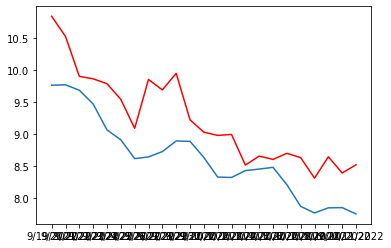

In [93]:
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()